<a href="https://colab.research.google.com/github/md-muqtadir-fuad/ml-models/blob/main/Audio_and_Speech_Precessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Audio and Speech Precessing

In [ ]:
!gdown --id 1OCUyv0q83oUhueLSgnE3wEKB5nhn6W9p
!unzip /content/audios.zip

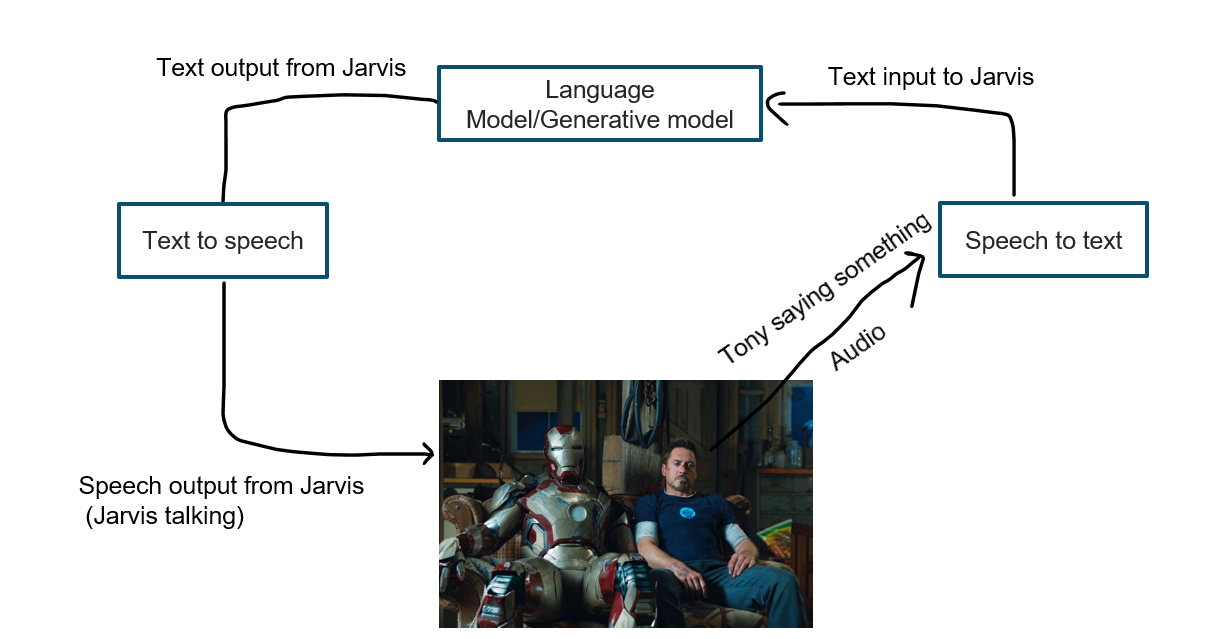

In [ ]:
from IPython.display import display,Image
display(Image('/content/audios/howJarvisWorks.PNG'))

In [ ]:
# Audio processing and aduio features
# Audio is just one type of one-d signal
# Sampling rate: how we are dividing the sample with respect to a small time. as sampling rate high the audi will be more accurate
# We will convert the fft

In [ ]:
# Suppose the audio sampling rate 48 k means  we have taken 48000 sample for 1 second
# Reducing sampling rate reduce audio quality
# Intensity depends on amplitude

In [ ]:
# To load , visualize and manipulate data
# pydub
# librosa
# wave

In [ ]:
import librosa
import pandas as pd
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

In [ ]:
path = "/content/audios/demo.wav"

In [ ]:
y, sr = librosa.load(path)

In [ ]:
print(f"Length of the audio in seconds: {librosa.get_duration(path = path)}")
print(f"Shape: {y.shape}")
print(f"Sample rate: {sr}")

Length of the audio in seconds: 18.356190476190477
Shape: (404754,)
Sample rate: 22050


In [ ]:
print(f"Length of the audio calculated from the audio time-series: {librosa.get_duration(y = y, sr =sr)}")
print(f"Some of the audio data: {y[:10]}")
ipd.Audio(y, rate = sr)

Length of the audio calculated from the audio time-series: 18.356190476190477
Some of the audio data: [ 5.5331143e-06 -1.1380684e-05 -7.8519388e-06 -1.0879130e-06
  2.7607541e-06 -1.8428616e-06 -1.7447881e-05  3.3382303e-06
 -2.3906834e-06  4.7032186e-06]


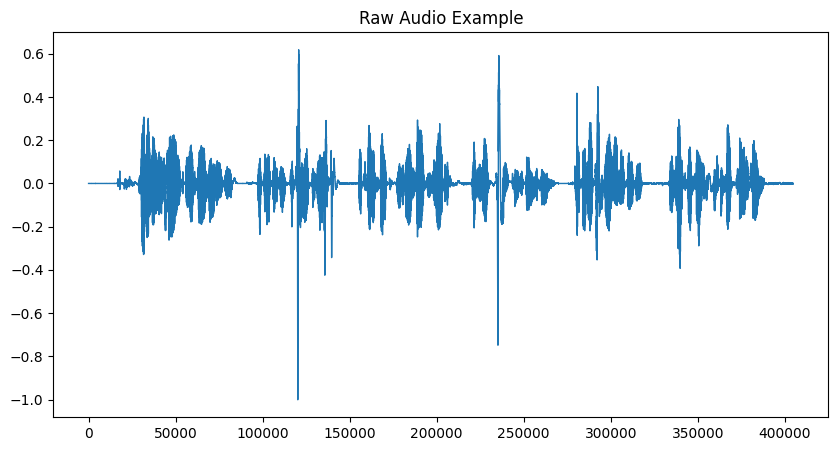

In [ ]:
pd.Series(y).plot(figsize = (10,5),
                  lw = 1,
                  title = "Raw Audio Example")
plt.show()

In [ ]:
#fft converts time domain to frequency domain
#Audio are mixture of many single frequencies

In [ ]:
 #Default FFT window size
 n_fft = 2048
 hop_length = 512

#Short time fourier transform
D = np.abs(librosa.stft(y, n_fft = n_fft, hop_length = hop_length))
print(f"Shape of D object: {D.shape}")

Shape of D object: (1025, 791)


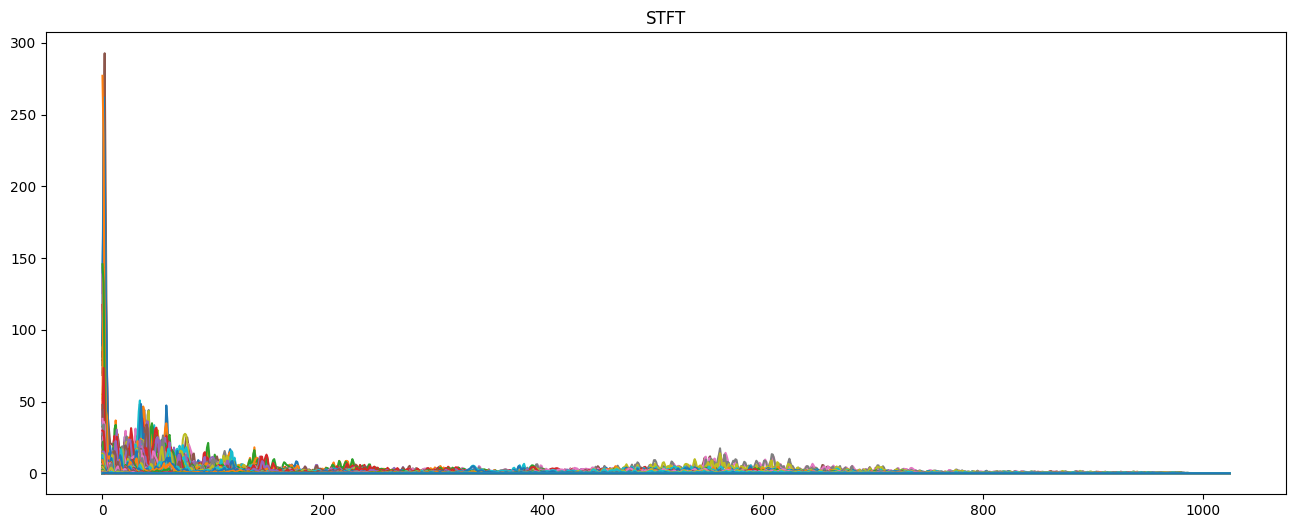

In [ ]:
plt.figure(figsize = (16,6))
plt.plot(D)
plt.title("STFT")
plt.show()

Text(0, 0.5, 'Amplitude')

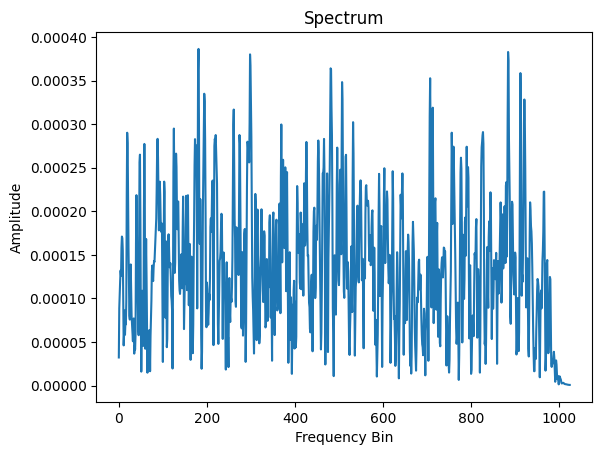

In [ ]:
n_fft = 2048
ft = np.abs(librosa.stft(y[:n_fft],hop_length = n_fft+1))
plt.plot(ft)
plt.title("Spectrum")
plt.xlabel("Frequency Bin")
plt.ylabel("Amplitude")

In [ ]:
# spectrogram: we take window and then fft of every window to see the change along with time


In [ ]:
n_fft = 2048
hop_length =512

D = librosa.stft(y, n_fft = n_fft, hop_length = hop_length)
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)
S_db.shape

(1025, 791)

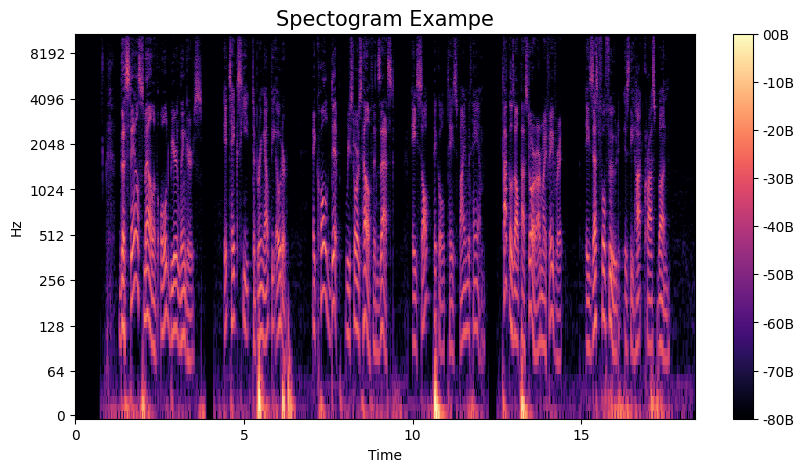

In [ ]:
#Plot the btransformed audio
fig, ax = plt.subplots(figsize = (10,5))
img = librosa.display.specshow(S_db, x_axis= 'time', y_axis = 'log', ax=ax)
ax.set_title("Spectogram Exampe",fontsize = 15)
fig.colorbar(img, ax=ax, format = "%0.2dB")
plt.show()

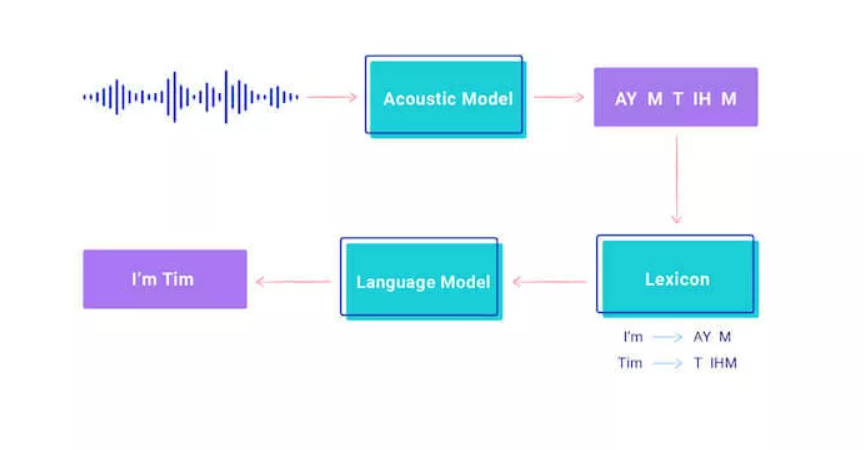

In [ ]:
display(Image("/content/audios/ASR flow.PNG"))

In [ ]:
import torch
from transformers import pipeline

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = pipeline(
    "automatic-speech-recognition",
    model = "openai/whisper-medium.en",
    chunk_length_s = 30,
    device = device
)

config.json:   0%|          | 0.00/1.95k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.06G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/1.95k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.83k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
y, sr = librosa.load("/content/audios/demo.wav")

In [ ]:
ipd.Audio(y, rate = sr)

In [ ]:
pipe("/content/audios/demo.wav")

/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


{'text': ' The stale smell of old beer lingers. It takes heat to bring out the odor. A cold dip restores health and zest. A salt pickle tastes fine with ham. Tacos al pastor are my favorite. A zestful food is the hot cross bun.'}

In [ ]:
y, sr = librosa.load("/content/audios/demo2.mp3")

In [ ]:
ipd.Audio(y, rate = sr)

In [ ]:
pipe("/content/audios/demo2.mp3")

/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


{'text': ' My dear Fanny, you feel these things a great deal too much. I am most happy that you like the chain.'}

Bangla ASR

In [ ]:
!pip install kenlm
!pip install pyctcdecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.4/427.4 kB 7.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for kenlm: filename=kenlm-0.2.0-cp311-cp311-linux_x86_64.whl size=3186677 sha256=c7d152b4b77f1b1dd67aeb923a8e80a54de8a2f77c8286873e0a81fb4c83a118
  Stored in directory: /root/.cache/pip/wheels/0f/40/64/979330b5c224c7f78a11a0bf592128af215178cb1207d9ca43
Successfully built kenlm
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 74.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
device ="cuda:0" if torch.cuda.is_available() else "cpu"
pipe_bn = pipeline(
    "automatic-speech-recognition",
    model = "shahruk10/wav2vec2-xls-r-300m-bengali-commonvoice",
    chunk_length_s = 30,
    device = device
)

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/343 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/96.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/262 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

attrs.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

alphabet.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

unigrams.txt:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

commonvoice-bn.5.arpa:   0%|          | 0.00/301M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
y, sr = librosa.load("/content/audios/demo_bangla.mp3")
ipd.Audio(y, rate = sr)

In [ ]:
result_1 = pipe_bn("/content/audios/demo_bangla.mp3")
print("Transcription:", result_1["text"])

Transcription: একটু বয়স হলে একটি বিদেশী


In [ ]:
asr_pipeline = pipeline("automatic-speech-recognition",
                        model="bangla-speech-processing/BanglaASR",
                        chunk_length_s = 30,
                        device = device)

result = asr_pipeline("/content/audios/demo_bangla.mp3")
print("Transcription:", result["text"])

config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.50k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/339 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.


Transcription: একটু বয়েশ হলে একটি বিদেশী।


In [ ]:
!pip install pydub
from pydub import AudioSegment
audio = AudioSegment.from_file("/content/test_file.m4a")
audio.export("/content/test_file.mp3", format = "mp3")

<_io.BufferedRandom name='/content/test_file.mp3'>

In [ ]:
result_test = pipe_bn("/content/test_file.mp3")
print("Transcription:", result_test["text"])

Transcription: বাংলাদেশ প্রকৌশল বিশ্ববিদ্যালয়ে হচ্ছে বাংলাদেশের শীর্ষস্থানীয় কারিগরি সম্পর্কিত উচ্চশিক্ষা প্রতিষ্ঠান এটি ঢাকা শহরের লালবাগ থানার পলাশী এলাকায় অবস্থিত কারিগরি শিক্ষা প্রসারের জন্য তালে ঢাকা সার্ভিস স্কুল নামে প্রতিষ্ঠিত স্কুলটি পরবর্তীতে আহসানউল্লাহ স্কুল অফ ইঞ্জিনিয়ারিংয়ে পরিণত বাংলাদেশের স্বাধীনতার পরে এর নাম হয় বাংলাদেশ প্রকৌশল ও প্রযুক্তি বিশ্ববিদ্যালয়ে


In [ ]:
result_3 = asr_pipeline("/content/test_file.mp3")
print("Transcription:", result_3["text"])

/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcription: বাংলাদেশ প্রকৌশল বিষয়বদ্ধল হচ্ছে বাংলাদেশের শীর্ষস্থানীয় কারিগুড়ী সম্পর্কিত উচ্চ শিক্ষা প্রতিষ্ঠান।এটি ঢাকা শহরের লালভাগ থানার পলাশী এলাকায় অবস্থিত। কারিগরবর্তীতে আহসানুল্লা স্কুল অব ইঞ্জিনিয়ারিংয়ে পরিণত করা হয়।ো বাংলাদেশের স্বাধীনতার পরে এর নাম হোয়ে বাংলাদেশ প্রকৌশল ও প্রযুক্তি বিশ্ববিদ্যালয়।


In [ ]:
#text to apeech
#Voice assistance

In [ ]:
from transformers import VitsModel, AutoTokenizer
import torch
import scipy

model = VitsModel.from_pretrained("facebook/mms-tts-eng")
tokenizer = AutoTokenizer.from_pretrained("facebook/mms-tts-eng")

text = "BUET offers high-quality research and education through its 18 departments under five faculties which are architecture and planning, civil engineering, engineering, electrical and electronic engineering, and mechanical engineering. Six university-led institutes also focus on diverse areas of research. BUET has over 600 faculty members and over 10000 undergraduate and graduate students. Graduates from BUET have a long history of enjoying extraordinary success all over the world, with many notable alumni serving as the global leaders in their respective fields."
inputs = tokenizer(text, return_tensors = 'pt')

with torch.no_grad():
  output = model(**inputs).waveform
ipd.Audio(output.numpy(), rate = model.config.sampling_rate)


config.json:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/145M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/413 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/47.0 [00:00<?, ?B/s]

# Creating JARVIS

In [ ]:
import locale
locale.getpreferedencoding = lambda: "UTF-8"

!pip install -qq ffmpeg-python

In [ ]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});

</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])

  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)

  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

Defining Helper function

In [ ]:
def speech2text(audio_path):
  return pipe(audio_path)["text"]

In [ ]:
!pip install openai==0.28.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.68.2
    Uninstalling openai-1.68.2:
      Successfully uninstalled openai-1.68.2


In [ ]:
import openai  # Make sure you have 'openai' installed via pip

def openai_chat_send(transcript):
    messages = [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": transcript}
    ]

    print("Transcript:")
    print(transcript)

    # Set your OpenAI API key
    openai.api_key = "#"

    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=messages
        )
        return response.choices[0].message["content"]

    except openai.error.OpenAIError as e:
        print("Error with OpenAI API:", e)
        return "Sorry, something went wrong with the OpenAI API."

In [ ]:
def tts(text):
  inputs = tokenizer(text, return_tensors="pt")

  with torch.no_grad():
      output = model(**inputs).waveform
  return output


In [ ]:
import scipy.io.wavfile
audio, sr = get_audio()
print("Recording stopped. Transcribing audio...")

scipy.io.wavfile.write("recording.wav", sr, audio)

# Transcribe the audio
transcript = speech2text("recording.wav")

# send user input to openai chatgpt
response = openai_chat_send(transcript)

# Print the assistant's response
print("Assistant:", response)

output = tts(response)
ipd.Audio(output.numpy(), rate = model.config.sampling_rate)

Recording stopped. Transcribing audio...


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcript:
 Do you know Jervis or Tony Stark? Can you explain about him?
Error with OpenAI API: You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.
Assistant: Sorry, something went wrong with the OpenAI API.
